In [38]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/H A R I H A R A N/Desktop/sem 8/Heart Disease/heart.csv")
Y = df['target']
X = df.drop(['target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 65)

# define the base classifiers
rf_clf = RandomForestClassifier(max_depth=759, max_features='log2', min_samples_leaf=2,criterion ='entropy',
                           n_estimators=200)
xgb_clf = XGBClassifier(learning_rate =0.1,n_estimators=250 ,max_depth=6, min_child_weight=1, gamma=1, subsample=0.6)
knn_clf = KNeighborsClassifier(n_neighbors=6)
gbc_clf = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 664, max_features = 'log2', min_samples_split = 0.1, 
                                    n_estimators = 476)

# define the meta classifier
meta_clf = RandomForestClassifier()

# define the stacked classifier
stacked_clf = StackingClassifier(estimators=[('rf', rf_clf), ('xgb', xgb_clf), ('knn', knn_clf), ('gbc', gbc_clf)],
                                  final_estimator=meta_clf)

# train the stacked classifier and evaluate its performance
stacked_clf.fit(X_train, y_train)
y_pred = stacked_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [39]:
print(accuracy)

0.9180327868852459


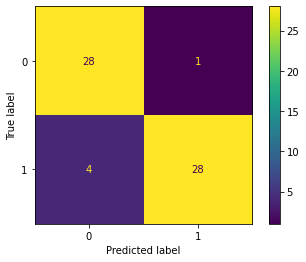

In [40]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();